# Evaluation of the german used car market applying data science

In this notebook, a deeper look on the german used car market is applied, using the "Used cars database" from Kaggle, supplied by Orges Leka in 2016. The dataset contains over 370.000 used car adds from ebay-kleinanzeigen. For the analysis and modelling, the Cross Industry Standard Process for Data Mining (CRISP-DM) is applied. The dataset is available here:  https://www.kaggle.com/orgesleka/used-cars-database

## Step 1: Business Understanding

Germany is a car-nation. Not only it is home to several of the worlds largest car manufacturers, like BMW, Mercedes-Benz and VW, there is also a huge number of car owners. According to the Kraftfahrt-Bundesamt, the german authority responsible for cars, in the beginning of 2019 64,8 million cars and trailers with an average age of 9.5 years were registered (https://www.kba.de/DE/Statistik/Fahrzeuge/Bestand/bestand_node.html). A huge market like this also has a big market for used cars. In the following, this market is being analyzed and several questions shall be answered:

1. What are the most common vehicle types?
2. Which brands are predominant on the german used cars market?
3. What is the average age of cars on the german used cars market?
4. Are there local differences? How are the offers distributed over Germany?
5. Concerning motorization: Which fuel-systems are preferred? What is the average motor-power?
6. What is the distribution of sale prizes?
7. What is a common mileage for used cars?
8. Can a car value be predicted by using features from the add?

## Step 2: Data Understanding

In the following, the required libraries as well as the data is being imported, and some basic statistics about the data are examined.

In [100]:
# Import librariers

# Basic libraries
import numpy as np
import pandas as pd

# Plot data
import matplotlib.pyplot as plt
%matplotlib inline

# Others
from scipy.stats import kde
import pickle

# Sklearn
#from sklearn.preprocessing import normalize
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import scale

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [2]:
# Read in data from csv files downloaded from https://www.kaggle.com/orgesleka/used-cars-database and save to dataframe
df_autos = pd.read_csv('autos.csv', encoding='latin8')

In [3]:
# Print data about data
print('Exact number of entries/rows in df_autos: {}'.format(df_autos.shape[0]))
print('Number of features/columns in df_autos: {}'.format(df_autos.shape[1]))
print('Feature/Column-names in df_autos: {}'.format(df_autos.columns.values))

Exact number of entries/rows in df_autos: 371528
Number of features/columns in df_autos: 20
Feature/Column-names in df_autos: ['dateCrawled' 'name' 'seller' 'offerType' 'price' 'abtest' 'vehicleType'
 'yearOfRegistration' 'gearbox' 'powerPS' 'model' 'kilometer'
 'monthOfRegistration' 'fuelType' 'brand' 'notRepairedDamage'
 'dateCreated' 'nrOfPictures' 'postalCode' 'lastSeen']


In [4]:
df_autos.shape

(371528, 20)

In [5]:
# Basic statistics about the numeral values:
df_autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
# Have a first look at the data:
df_autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


What already can be noticed is that there are several NaN values in the data, as well as columns, which might contain data, that is not very useful in the following. Lateron, I will deal with the NaN-values. Also it seems that certain columns might be less useful than others or might not have any use at all. Let's check that by evaluating the distinct values and their counts of certain columns:

In [7]:
# Check column values for relevance and drop irrelevant columns
print(np.unique(df_autos['offerType'],return_counts=True))
print(np.unique(df_autos['abtest'],return_counts=True))
print(np.unique(df_autos['nrOfPictures'],return_counts=True))
print(np.unique(df_autos['seller'],return_counts=True))

(array(['Angebot', 'Gesuch'], dtype=object), array([371516,     12], dtype=int64))
(array(['control', 'test'], dtype=object), array([178943, 192585], dtype=int64))
(array([0], dtype=int64), array([371528], dtype=int64))
(array(['gewerblich', 'privat'], dtype=object), array([     3, 371525], dtype=int64))


- 'offerType' contains the values 'Angebot' and 'Gesuch', which translates to 'Offer' and 'Requested'. As there are only 12 Requests, those colum as well as the requests themselves are dropped.
- 'abtest': No importance on the analysis. Drop.
- 'nrOfPictures' will be dropped, as there are 0-entries only
- 'seller' contains only 3 'gewerblich' (commercial sellers) only, the rest are private sellers. Column will be dropped.
- 'dateCrawled': No importance on the analysis. Drop.
- 'monthOfRegistration': To keep things easy, we will focus on the year only. Drop.
- 'dateCreated': No importance on the analysis. Drop.
- 'lastSeen': No importance on the analysis. Drop.
- 'name': This column might contain useful information, yet the effort to use it is a lot higher than for the other features, as it is free text. To keep things simple, it is dropped.

In [8]:
# Having a more detailed look on the NaNs by columns:
df_autos.isnull().sum(axis = 0)

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

So there is a big number of NaN-values, especially with notRepairedDamage or vehicleType. I will have to deal with that when it comes to preparing for the modelling to predict prizes. For the other questions, it is less of a problem, the NaN-values will be dropped separately for every analysis.

'yearOfRegistration' does not have any missing values, but it seems like there are some values contained, that obviously don't make sense:

(array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1911, 1915, 1919, 1920, 1923, 1925,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800,
       2900, 3000, 3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000,
       5300, 5555, 5600, 5900, 5911, 6000, 6200, 6500, 7000, 7100, 7500,
       7777, 7800, 8000, 8200, 8455, 8500, 8888, 9

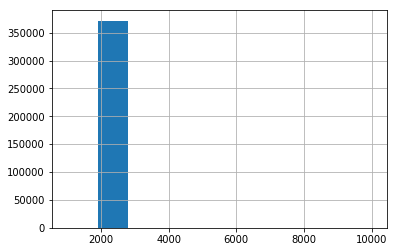

In [9]:
# Show registration years with counts and plot histogram
print(np.unique(df_autos['yearOfRegistration'],return_counts=True))
df_autos['yearOfRegistration'].hist()

In [10]:
# As the first car was built in 1885, check every year separately to manually inspect whether the entries make sense or not.
for year in range(1885, 1950):
    print('Year: {}'.format(year))
    print(df_autos[df_autos['yearOfRegistration'] == year].name.values)

Year: 1885
[]
Year: 1886
[]
Year: 1887
[]
Year: 1888
[]
Year: 1889
[]
Year: 1890
[]
Year: 1891
[]
Year: 1892
[]
Year: 1893
[]
Year: 1894
[]
Year: 1895
[]
Year: 1896
[]
Year: 1897
[]
Year: 1898
[]
Year: 1899
[]
Year: 1900
[]
Year: 1901
[]
Year: 1902
[]
Year: 1903
[]
Year: 1904
[]
Year: 1905
[]
Year: 1906
[]
Year: 1907
[]
Year: 1908
[]
Year: 1909
[]
Year: 1910
['KA_Lufthansa_Edition_450\x80_VB' 'Bellier_Vario'
 'Opel_100_Jahre__Kunstdrucke'
 'Tausche/Verkaufe_S51_gegen_Audi_ab_150ps_oder_1.9tdi'
 'Suche_VW_mit_Diesel__54_PS' 'SUCHE_Golf_1_1_8t_G60_2_0_16V_ab_150_Ps'
 'VW_Passat_Kombi_H_Kennzeichen' 'vw_polo_86c'
 'Suche_guenstiges_Auto_mit_TÜV'
 'Zeugen_gesucht_in_22869_Schenefeld_!!!!!!!!!!!!!!!!'
 'Fiat_Punto_ohne_Motor_und_Getriebe'
 'Caddy_14d__Schlachten_oder_Herichten.' 'VW_T1_Karosse_ohne_motor'
 'Algila_mit_motorschaden'
 'Suche_Fahrzeug_mit_Anhaengerkupplung_und_LPG_Gas_bis_1000\x80'
 'E30_3.20_suche_bitte_melden' 'Vw_Beetle_1_9_Tdi'
 'Sommerreifen_175/70_R14_auf_Felgen' 'Tueren

It looks like everything offer that has year <=1910 is clearly not a real car offer with correct data. Those columns are dropped lateron. The same applies to entries with year > 2016, those are also obviously incorrect, as the dataset originates form 2016. So only rows with 1910 < year <2017 are kept, the rest is dropped.

0.1-quantile at: 0.0
0.999-quantile at: 703.4730000000563


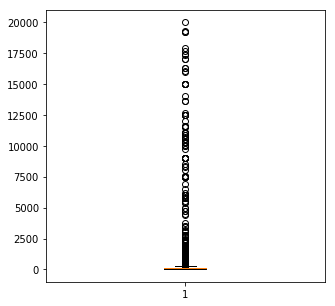

In [11]:
# Plot boxplot of motor power
plt.figure(figsize=(5,5))

#test = df_autos_locs[df_autos_locs['powerPS'] < df_autos_locs['powerPS'].quantile(0.999)]
_ = plt.boxplot(df_autos['powerPS'])

print('0.1-quantile at: {}'.format(df_autos['powerPS'].quantile(0.1)))
print('0.999-quantile at: {}'.format(df_autos['powerPS'].quantile(0.999)))

Well, a motor power of 20000 PS does not look quite realistic, as well as 0. So, only rows that have a power of more than 0 PS and less than 1000 PS will be kept.

0.001-quantile at: 0.0
0.01-quantile at: 0.0
0.99-quantile at: 36000.0
0.999-quantile at: 108689.20000002254
0.999-quantile at: 11111111.0


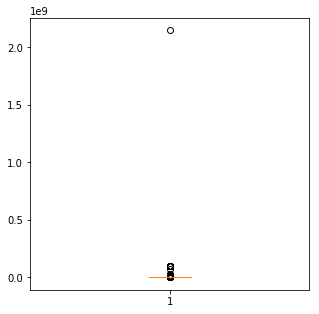

In [12]:
# Plot boxplot of prices
plt.figure(figsize=(5,5))

#test = df_autos_locs[df_autos_locs['powerPS'] < df_autos_locs['powerPS'].quantile(0.999)]
_ = plt.boxplot(df_autos['price'])

print('0.001-quantile at: {}'.format(df_autos['price'].quantile(0.001)))
print('0.01-quantile at: {}'.format(df_autos['price'].quantile(0.01)))
print('0.99-quantile at: {}'.format(df_autos['price'].quantile(0.99)))
print('0.999-quantile at: {}'.format(df_autos['price'].quantile(0.999)))
print('0.999-quantile at: {}'.format(df_autos['price'].quantile(0.9999)))

A price of 0 is possible, yet a price of more than, say, 1 Million € for a used car is not. So everything above 1 Million is dropped.

In [13]:
# Check data types of all columns:
for col in df_autos.columns:
    print(col + ': ' + str(type(df_autos[col].values[0])))

dateCrawled: <class 'str'>
name: <class 'str'>
seller: <class 'str'>
offerType: <class 'str'>
price: <class 'numpy.int64'>
abtest: <class 'str'>
vehicleType: <class 'float'>
yearOfRegistration: <class 'numpy.int64'>
gearbox: <class 'str'>
powerPS: <class 'numpy.int64'>
model: <class 'str'>
kilometer: <class 'numpy.int64'>
monthOfRegistration: <class 'numpy.int64'>
fuelType: <class 'str'>
brand: <class 'str'>
notRepairedDamage: <class 'float'>
dateCreated: <class 'str'>
nrOfPictures: <class 'numpy.int64'>
postalCode: <class 'numpy.int64'>
lastSeen: <class 'str'>


The data types look fine, for the general analysis no further work is needed. It will be needed though for the prediction task.

## Step 3: Data Preparation

By using the insights gathered above, the data is being prepared for further analysis.

### General Data Preparation for all Questions

In [14]:
# Drop rows that are requests and keep offers. Check whether 12 rows are removed.
print(df_autos.shape[0])
df_autos = df_autos[df_autos.offerType != 'Gesuch']
print(df_autos.shape[0])

371528
371516


In [15]:
# Drop all pf the above named columns. Check number of columns.
print(df_autos.shape[1])
remove_cols = ['offerType', 'abtest', 'nrOfPictures', 'seller', 'dateCrawled',
               'monthOfRegistration', 'dateCreated', 'lastSeen', 'name']
df_autos = df_autos.drop(columns=remove_cols)
print(df_autos.shape[1])

20
11


In [16]:
# Drop rows with years that do not make sense.
print(len(df_autos))
df_autos = df_autos[df_autos['yearOfRegistration'] > 1910]
df_autos = df_autos[df_autos['yearOfRegistration'] < 2017]
print(len(df_autos))

371516
356664


In [17]:
print(len(df_autos))
df_autos = df_autos[df_autos['powerPS'] > 0]
df_autos = df_autos[df_autos['powerPS'] < 1000]
print(len(df_autos))

356664
319465


In [18]:
print(len(df_autos))
df_autos = df_autos[df_autos['price'] < 1000000]
print(len(df_autos))

319465
319422


In [19]:
# Display data again:
df_autos.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
1,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,66954
2,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,90480
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,nein,91074
4,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,nein,60437
5,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,ja,33775


As I want to make an analysis on local features, only the ZIP-Code as in 'postalCode' is not sufficient. By using a dataset on german Zip-Codes with, I will add more detailed information on the locations. The dataset PLZ.tab used here is available on: http://opengeodb.org/wiki/PLZ.tab

In [20]:
# Load in dataset
df_zips = pd.read_csv('PLZ.tab', encoding='UTF-8', sep='\t')
df_zips.head(50)

,#loc_id,plz,lon,lat,Ort
0,5078,1067,13.721068,51.060034,Dresden
1,5079,1069,13.738907,51.039559,Dresden
2,5080,1097,13.743967,51.066745,Dresden
3,5081,1099,13.828980,51.092619,Dresden
4,153646,1108,13.828980,51.092619,Dresden
5,5082,1109,13.761965,51.120101,Dresden
6,5083,1127,13.733347,51.079630,Dresden
7,5084,1129,13.727410,51.096794,Dresden
8,5085,1139,13.691144,51.080557,Dresden
9,5106,1156,13.623307,51.066631,Cossebaude


In [21]:
# Drop the unneeded column #loc_id
df_zips = df_zips.drop(columns='#loc_id')
# Merge with the auto-dataset on 'postalCode' and 'plz' and create a new DataFrame from it
df_autos_locs = pd.merge(df_autos, df_zips, left_on='postalCode', right_on='plz')
df_autos_locs = df_autos_locs.drop(columns='plz')
df_autos_locs.rename(columns={'Ort': 'city'})
df_autos_locs.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,lon,lat,Ort
0,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,66954,7.564295,49.202121,Pirmasens
1,3450,kleinwagen,2007,manuell,88,fiesta,100000,benzin,ford,nein,66954,7.564295,49.202121,Pirmasens
2,950,bus,1998,manuell,114,espace,150000,benzin,renault,nein,66954,7.564295,49.202121,Pirmasens
3,10300,kombi,2006,automatik,170,passat,125000,diesel,volkswagen,nein,66954,7.564295,49.202121,Pirmasens
4,6500,bus,2005,manuell,193,b_klasse,100000,benzin,mercedes_benz,nein,66954,7.564295,49.202121,Pirmasens


In [22]:
print(df_autos.shape)
print(df_autos_locs.shape)

(319422, 11)
(319257, 14)


The number of rows decreased some, from 319422 rows before merging to 319257 afterwards. As there are no explicit NaN-values in the Zip-Codes, it is most likely that this is due to ZIP-Codes, that could not be matched. I assume that those are erratic or non-existing ZIP-codes. As that number is quite low anyways, that is fine.

Totally, so far the number of rows decreased from 371528 before cleaning to 319257 afterwards. That is a little more than 50000 rows, but there is still plenty of data.

### Specific Data Preparation to predict prices
To predict the prices, a specific data preparation is needed. For convenience, after this general preparation, it is done in the modelling section.

## Step 4: Modeling

In this section, the analysis itself will be executed. First I will deal with the analytical questions and afterwards the prize-prediction will be implemented.

### Function definitions for later usage

In [23]:
# Define function to count the unique values of a dataframe and return in a sorted fashion. Also drop NaNs before.
def count_col_vals(df, col):
    # Drop NaNs and return number of dropped rows and remaining rows
    len_before = len(df)
    df = df.dropna(subset=[col])
    print('Dropped {} NaN-Rows for column {}.'.format(len_before - len(df), col))
    print('Number of remaining rows is {}.'.format(len(df)))
    # Sort and count
    data_labels, data_counts = np.unique(df[col],return_counts=True)
    d = {'labels': data_labels, 'counts': data_counts}
    df_result = pd.DataFrame(data=d).sort_values(by='counts').reset_index(drop=True)
    df_result['percentage'] = df_result['counts'] / sum(df_result['counts'])
    # Print in descending order and return df
    print()
    print(df_result.tail(50).iloc[::-1])
    return df_result

In [24]:
# Define function to plot barchart from dataframe
def plot_barchart(data_labels, data_counts, y_label, chart_title, height=10, numbers_label='Count'):
    y_pos = np.arange(len(data_labels))
    plt.figure(figsize=(20,height))
    plt.barh(y_pos, data_counts, align='center', alpha=1)    
    plt.yticks(y_pos, data_labels)
    plt.xlabel(numbers_label)
    plt.ylabel(y_label)
    plt.title(chart_title)    
    plt.show()

### Q1: What are the most common vehicle types?

In [25]:
df_types_results = count_col_vals(df_autos_locs, 'vehicleType')

Dropped 12124 NaN-Rows for column vehicleType.
Number of remaining rows is 307133.

       labels  counts  percentage
7   limousine   89076    0.290024
6  kleinwagen   71594    0.233104
5       kombi   62759    0.204338
4         bus   27865    0.090726
3      cabrio   21631    0.070429
2       coupe   17782    0.057897
1         suv   13740    0.044736
0      andere    2686    0.008745


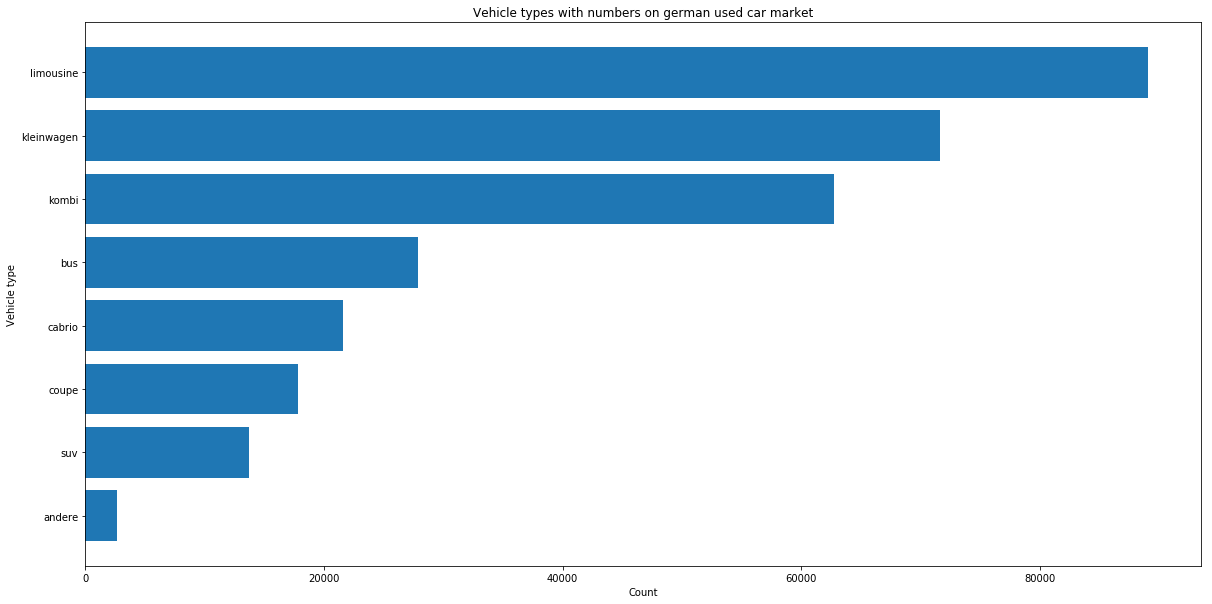

In [26]:
#Plot barchart
plot_title = 'Vehicle types with numbers on german used car market'
plot_barchart(df_types_results.labels, df_types_results.counts, 'Vehicle type', plot_title)

### Q2: Which brands are predominant on the german used cars market?

Dropped 0 NaN-Rows for column brand.
Number of remaining rows is 319257.

            labels  counts  percentage
39      volkswagen   68194    0.213602
38             bmw   36229    0.113479
37            opel   33600    0.105244
36   mercedes_benz   30873    0.096703
35            audi   29587    0.092675
34            ford   21504    0.067356
33         renault   14298    0.044785
32         peugeot    9582    0.030013
31            fiat    7889    0.024710
30            seat    6099    0.019104
29           skoda    5125    0.016053
28           mazda    4888    0.015311
27           smart    4519    0.014155
26         citroen    4360    0.013657
25          nissan    4217    0.013209
24          toyota    4124    0.012917
23         hyundai    3200    0.010023
22            mini    3167    0.009920
21           volvo    2991    0.009369
20      mitsubishi    2598    0.008138
19           honda    2459    0.007702
18  sonstige_autos    2446    0.007662
17             kia    2217   

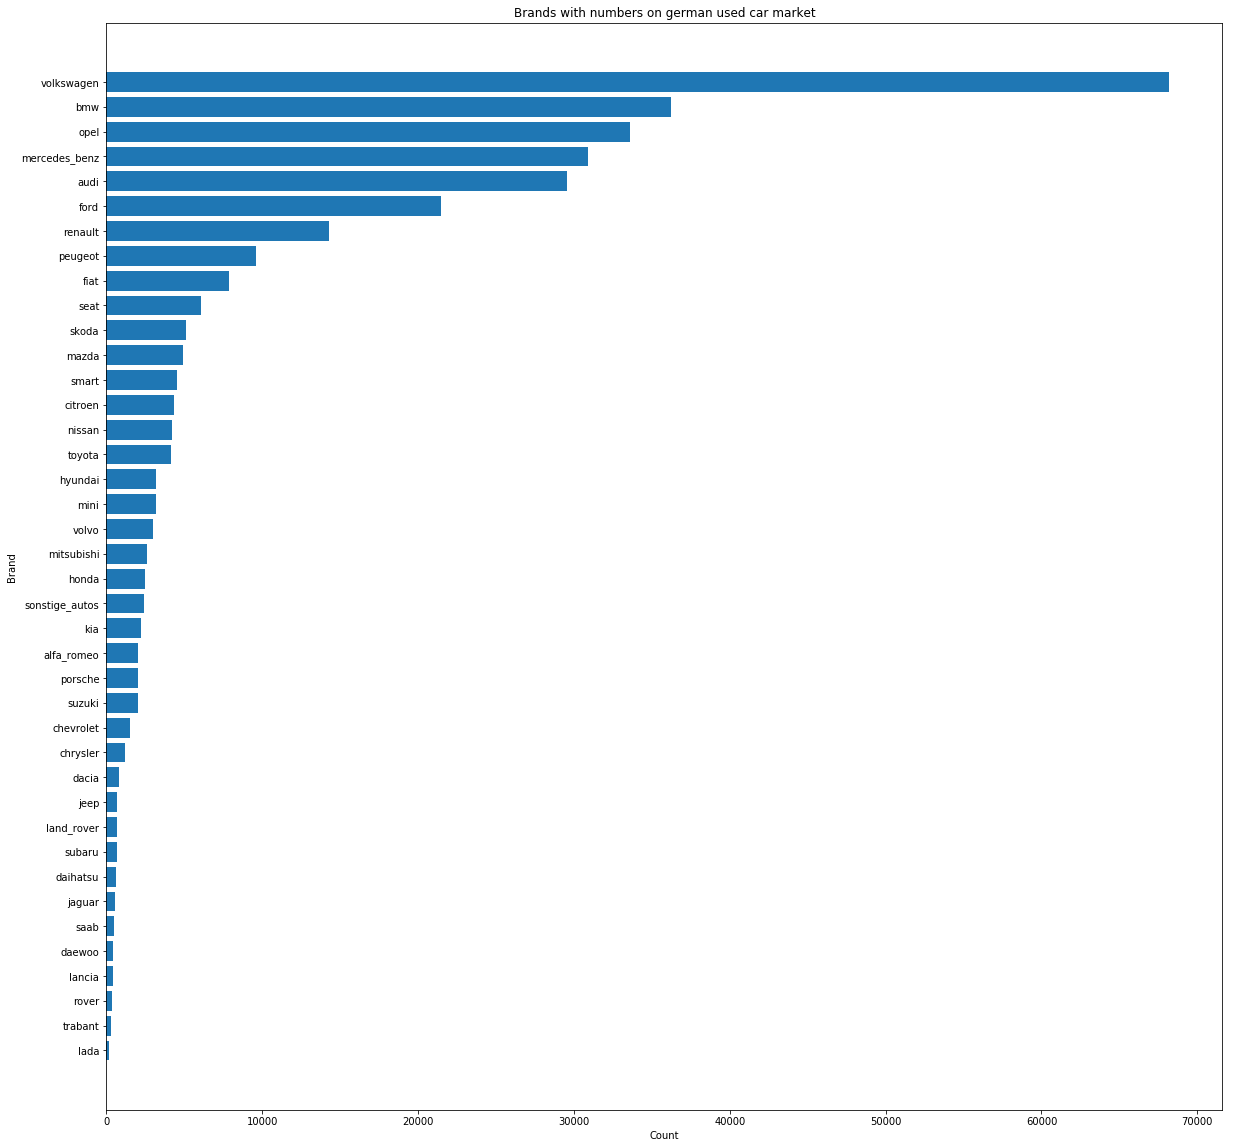

In [27]:
df_brands_results = count_col_vals(df_autos_locs, 'brand')
plot_title = 'Brands with numbers on german used car market'
plot_barchart(df_brands_results.labels, df_brands_results.counts, 'Brand', plot_title, 20)

### Q3: What is the average age of cars on the german used cars market?

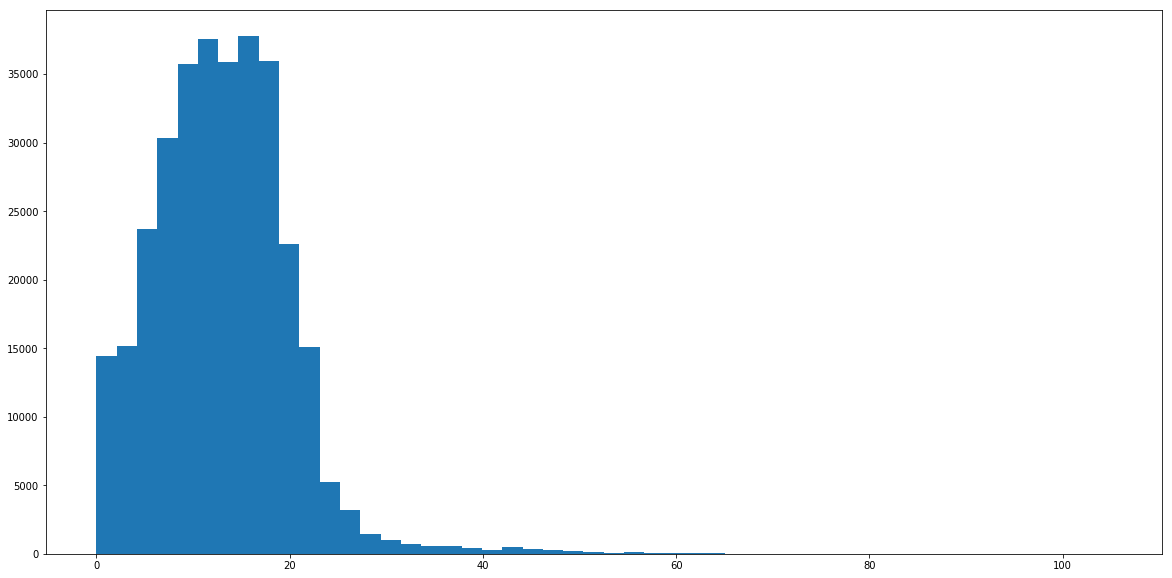

In [28]:
# Create age column and plot age-histrogram
df_autos_locs['age'] = 2016 - df_autos_locs['yearOfRegistration']
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos_locs['age'], bins=50, histtype='bar')

The definitition for an "Oldtimer"-car varies, but commonly it is defined as cars with an age of more than 30 years. So display a histogram of non-Oldtimer cats only.

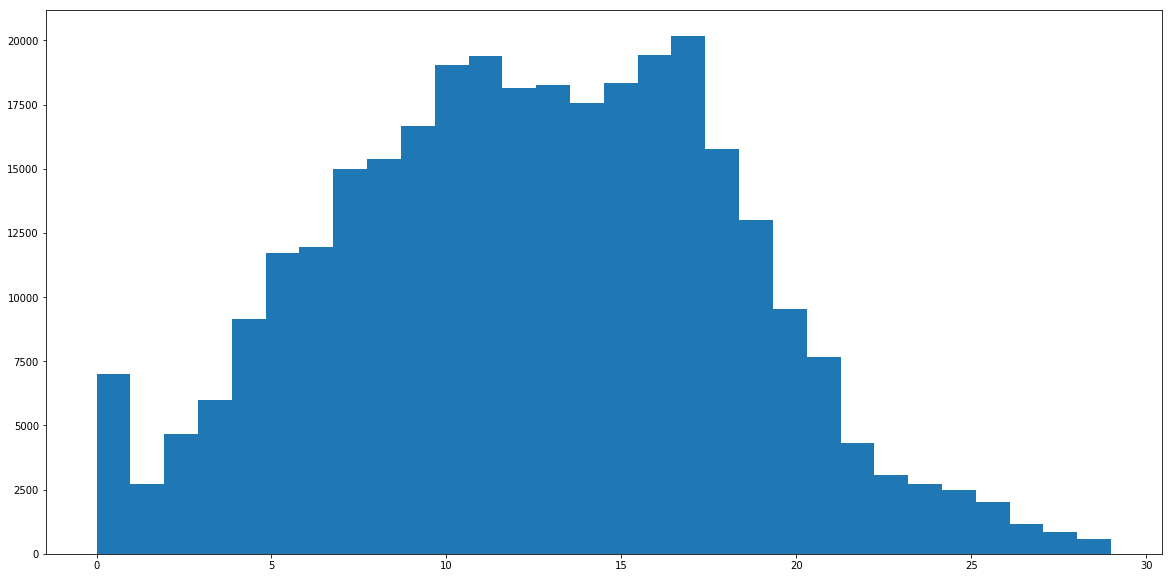

In [29]:
# Display non-Oldtimer cars only
n_years = 30
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos_locs[df_autos_locs['age'] < n_years].age, bins=n_years, histtype='bar')

In [30]:
# Display descriptive statistics on the yearOfRegistration and age
print(df_autos_locs['yearOfRegistration'].describe())
print()
print(df_autos_locs['age'].describe())

count    319257.000000
mean       2003.081608
std           6.901614
min        1911.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2016.000000
Name: yearOfRegistration, dtype: float64

count    319257.000000
mean         12.918392
std           6.901614
min           0.000000
25%           8.000000
50%          13.000000
75%          17.000000
max         105.000000
Name: age, dtype: float64


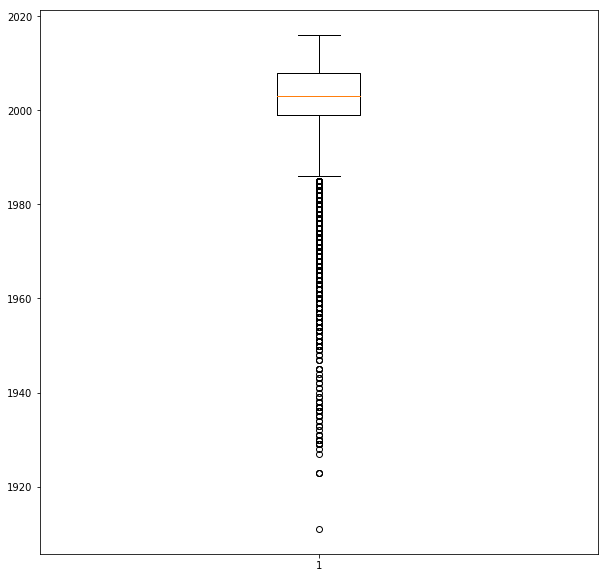

In [31]:
# Plot boxplot of years
plt.figure(figsize=(10,10))
_ = plt.boxplot(df_autos_locs['yearOfRegistration'])

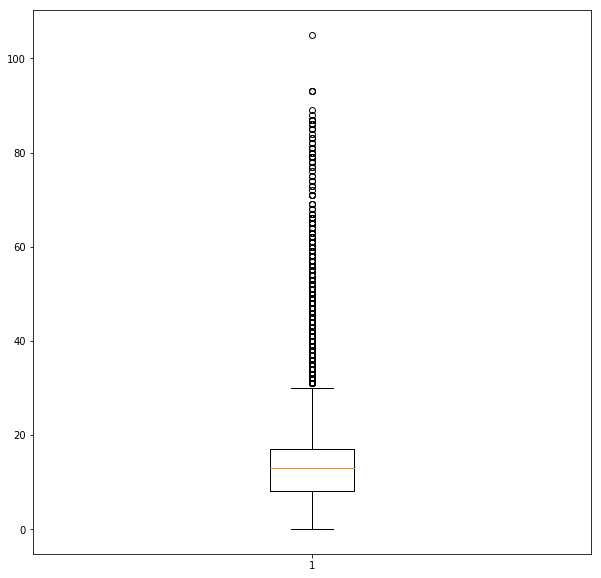

In [32]:
# Plot boxplot of car ages
plt.figure(figsize=(10,10))
_ = plt.boxplot(df_autos_locs['age'])

###  Q4: Are there local differences? How are the offers distributed over Germany?

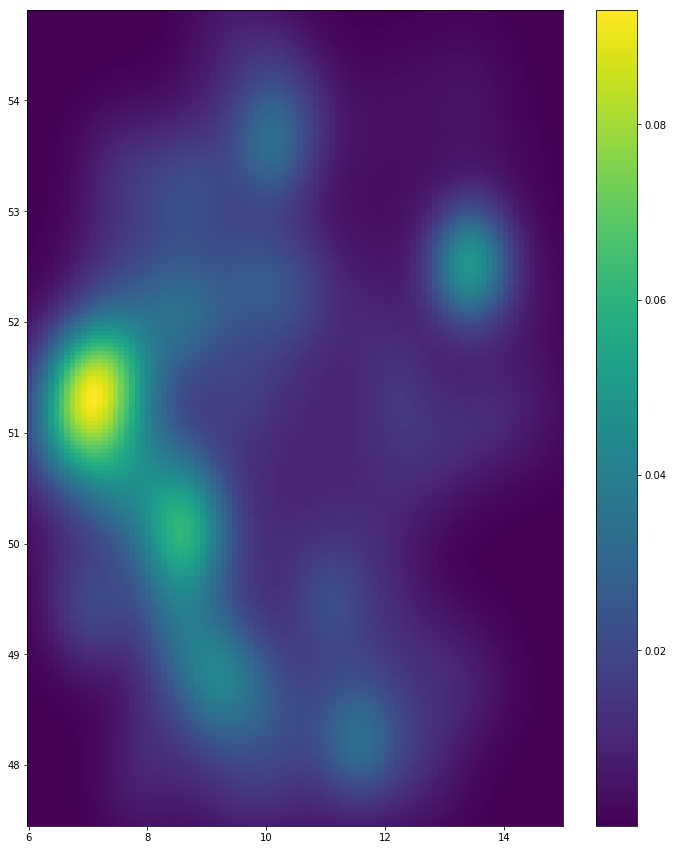

In [33]:
# Shorten Dataframe and pick random samples
n = 10000
df_autos_locs_short = df_autos_locs.sample(n, random_state=47)

# Plot location-density according to https://python-graph-gallery.com/85-density-plot-with-matplotlib/
x = df_autos_locs_short.lon
y = df_autos_locs_short.lat

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*2j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(12,15))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.colorbar()
plt.show()

In [34]:
df_cities_results = count_col_vals(df_autos_locs, 'Ort')

Dropped 0 NaN-Rows for column Ort.
Number of remaining rows is 319257.

                     labels  counts  percentage
6214                 Berlin   12768    0.039993
6213                Hamburg    6000    0.018794
6212                München    4211    0.013190
6211      Frankfurt am Main    3797    0.011893
6210                   Köln    3599    0.011273
6209                  Essen    2540    0.007956
6208               Dortmund    2536    0.007943
6207               Hannover    2241    0.007019
6206               Duisburg    2080    0.006515
6205                 Bremen    1983    0.006211
6204               Nürnberg    1976    0.006189
6203             Düsseldorf    1848    0.005788
6202              Stuttgart    1632    0.005112
6201              Wuppertal    1606    0.005030
6200          Gelsenkirchen    1550    0.004855
6199              Bielefeld    1508    0.004723
6198                 Bochum    1489    0.004664
6197              Wiesbaden    1486    0.004655
6196            

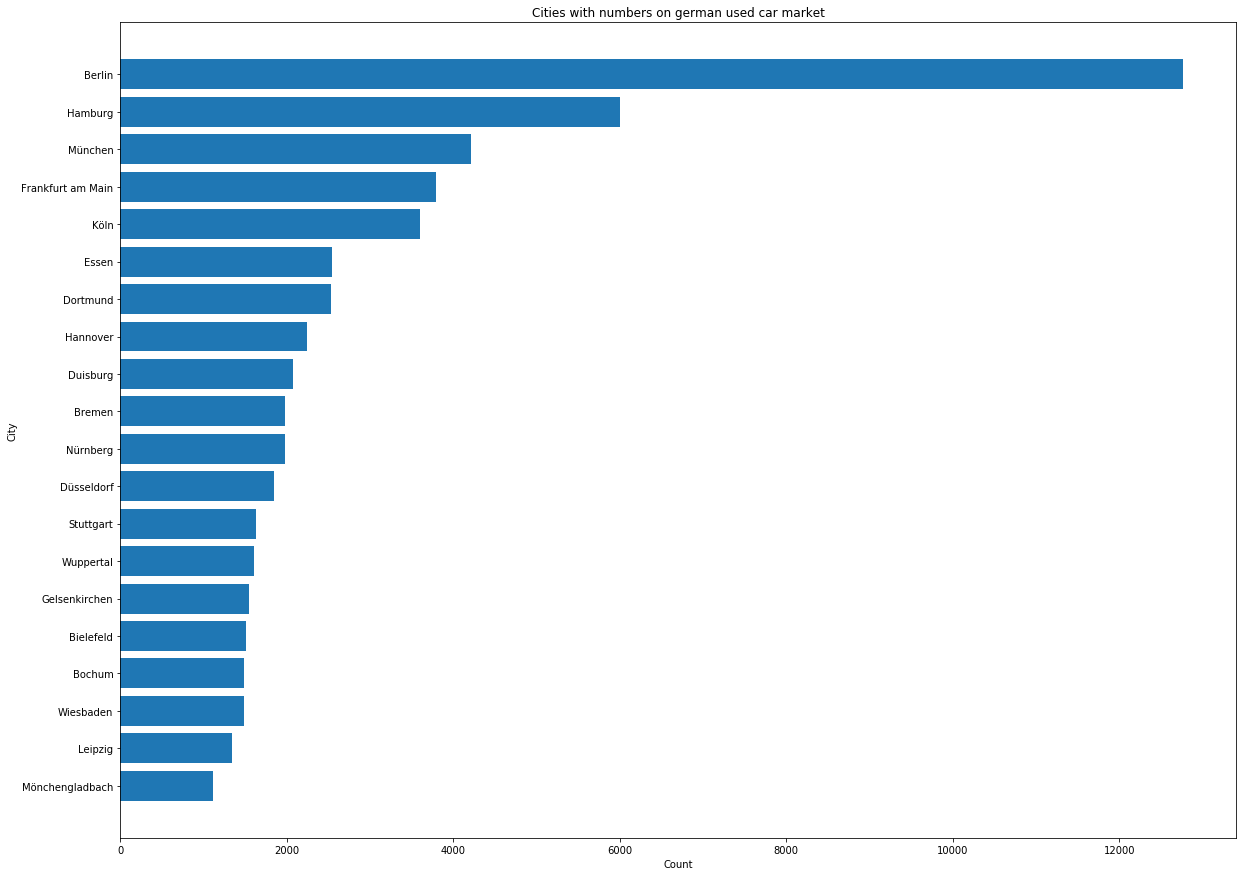

In [35]:
n = 20
df_cities_results_short = df_cities_results.tail(n)
plot_title = 'Cities with numbers on german used car market'
plot_barchart(df_cities_results_short.labels, df_cities_results_short.counts, 'City', plot_title, 15)

In the following, the median is used instead of the mean, as it is more robust to extreme values and thus more meaningful in this case, as there are quite some extreme values.

In [36]:
# Of those n cities with the most offers, group by city and display mean values

len_before = len(df_autos_locs)
df = df_autos_locs.dropna(subset=['Ort']).dropna(subset=['price'])
print('Dropped {} NaN-Rows for column {}.'.format(len_before - len(df), col))
print('Number of remaining rows is {}.'.format(len(df)))

# Sort and count
df = df[df.Ort.isin(df_cities_results_short.labels.values)]

df_result = df.groupby(['Ort']).median().drop(columns=['postalCode', 'lon', 'lat'])
df_result

Dropped 0 NaN-Rows for column lastSeen.
Number of remaining rows is 319257.


,price,yearOfRegistration,powerPS,kilometer,age
Ort,,,,,
Berlin,3500.0,2004.0,116.0,150000.0,12.0
Bielefeld,3550.0,2004.0,116.0,150000.0,12.0
Bochum,3300.0,2004.0,110.0,150000.0,12.0
Bremen,2990.0,2003.0,110.0,150000.0,13.0
Dortmund,3200.0,2004.0,115.0,150000.0,12.0
Duisburg,2525.0,2003.0,107.0,150000.0,13.0
Düsseldorf,3450.0,2003.0,117.5,150000.0,13.0
Essen,2990.0,2003.0,110.0,150000.0,13.0
Frankfurt am Main,4440.0,2005.0,129.0,150000.0,11.0


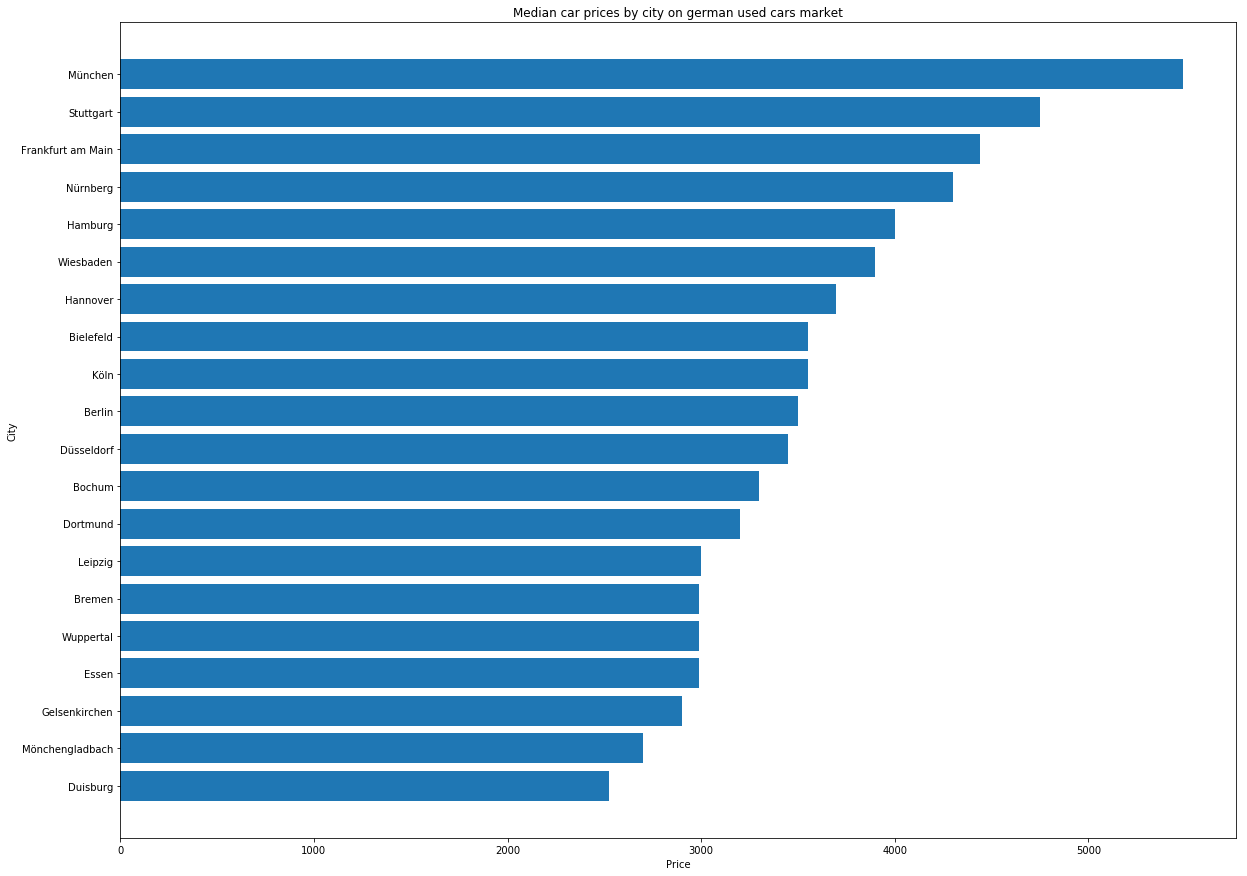

In [37]:
# Print barchart of prizes
df_result = df_result.sort_values(by='price')
plot_title = 'Median car prices by city on german used cars market'
plot_barchart(df_result.index, df_result.price, 'City', plot_title, 15, 'Price')

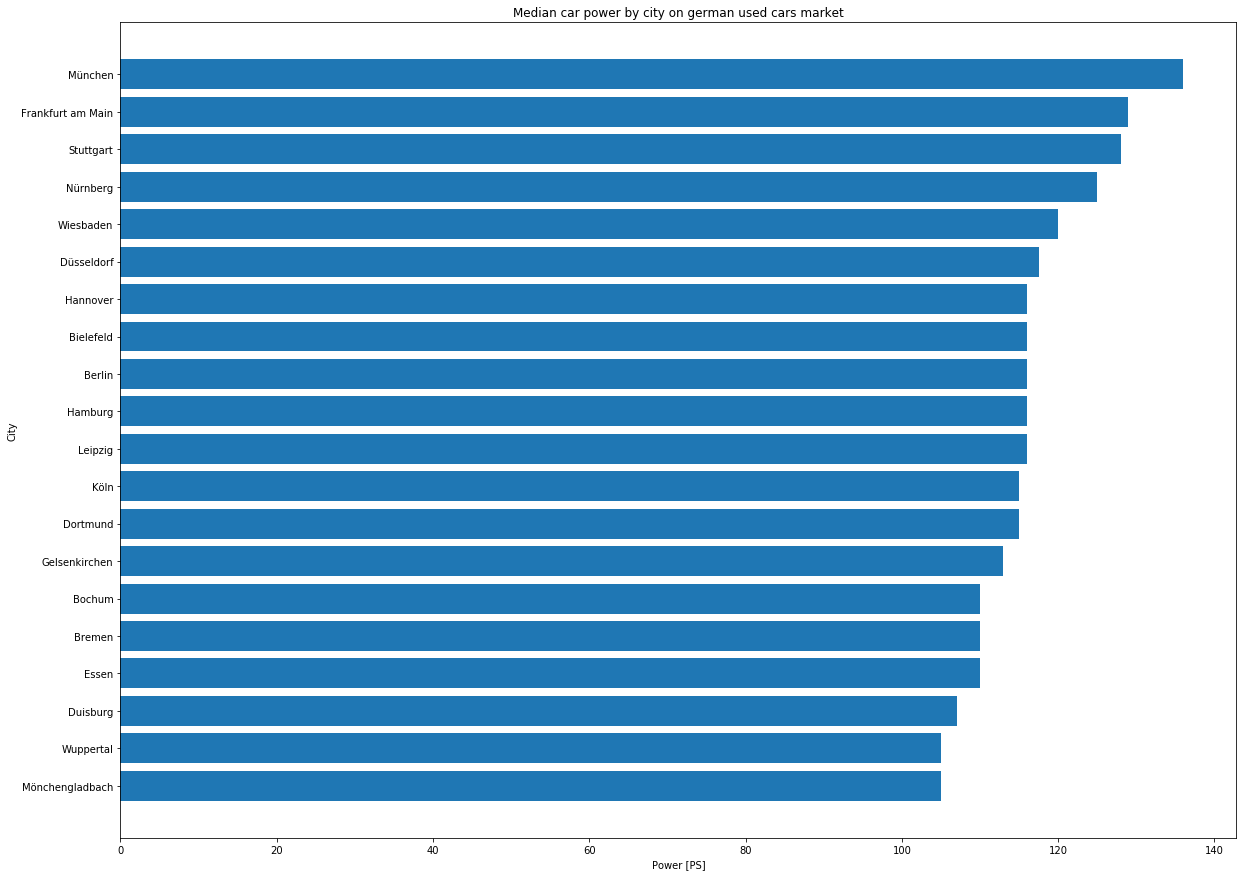

In [38]:
# Print barchart of prizes
df_result = df_result.sort_values(by='powerPS')
plot_title = 'Median car power by city on german used cars market'
plot_barchart(df_result.index, df_result.powerPS, 'City', plot_title, 15, 'Power [PS]')

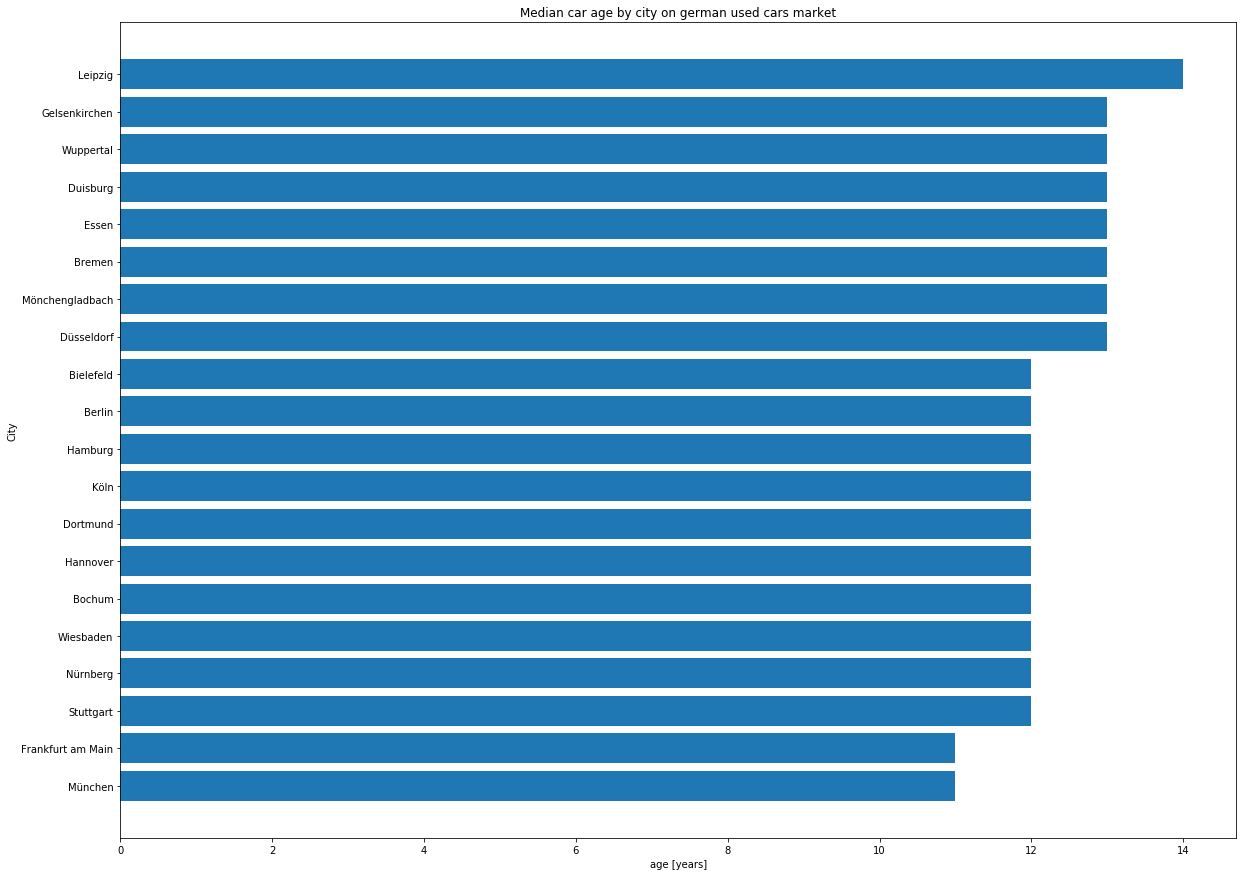

In [39]:
# Print barchart of prizes
df_result = df_result.sort_values(by='age')
plot_title = 'Median car age by city on german used cars market'
plot_barchart(df_result.index, df_result.age, 'City', plot_title, 15, 'age [years]')

### Q5: Concerning motorization: Which fuel-systems are preferred? What is the average motor-power?

Dropped 16967 NaN-Rows for column fuelType.
Number of remaining rows is 302290.

    labels  counts  percentage
6   benzin  198792    0.657620
5   diesel   97710    0.323233
4      lpg    4861    0.016081
3      cng     494    0.001634
2   hybrid     245    0.000810
1   andere     100    0.000331
0  elektro      88    0.000291


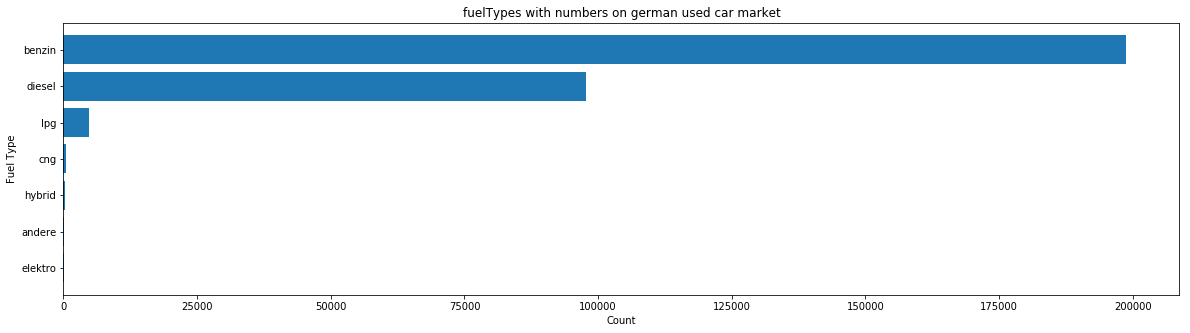

In [40]:
df_brands_results = count_col_vals(df_autos_locs, 'fuelType')
plot_title = 'fuelTypes with numbers on german used car market'
plot_barchart(df_brands_results.labels, df_brands_results.counts, 'Fuel Type', plot_title, 5)

Dropped 5881 NaN-Rows for column gearbox.
Number of remaining rows is 313376.

      labels  counts  percentage
1    manuell  242956    0.775286
0  automatik   70420    0.224714


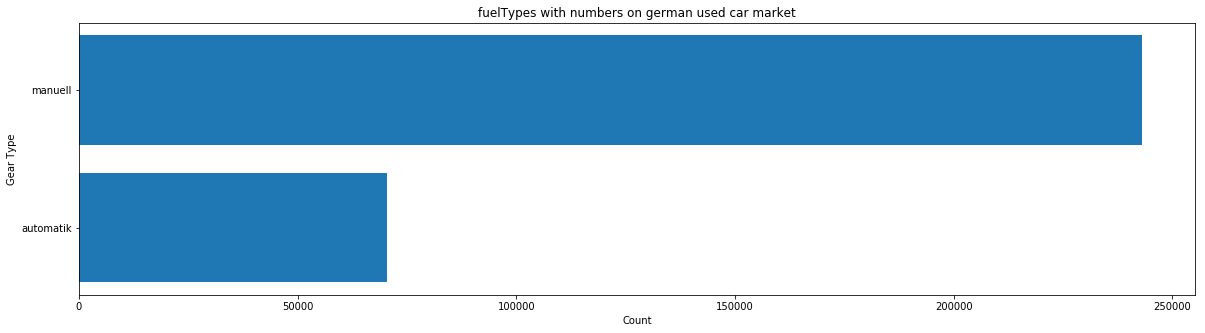

In [41]:
df_brands_results = count_col_vals(df_autos_locs, 'gearbox')
plot_title = 'fuelTypes with numbers on german used car market'
plot_barchart(df_brands_results.labels, df_brands_results.counts, 'Gear Type', plot_title, 5)

In [42]:
# Descriptive Statistics on Power
df_autos_locs['powerPS'].describe()

count    319257.000000
mean        126.452667
std          62.933838
min           1.000000
25%          80.000000
50%         116.000000
75%         150.000000
max         999.000000
Name: powerPS, dtype: float64

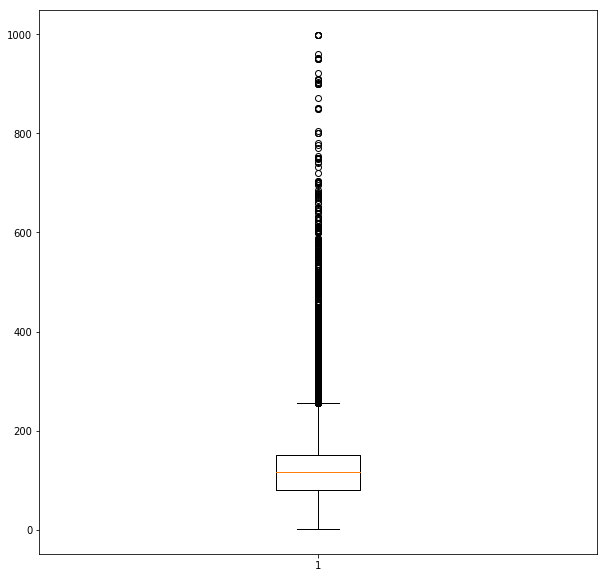

In [43]:
# Plot boxplot of motor power
plt.figure(figsize=(10,10))
_ = plt.boxplot(df_autos_locs['powerPS'])

### Q6: What is the distribution of sale prices?

In [44]:
# Descriptive Statistics on sale prices
df_autos_locs['price'].describe()

count    319257.000000
mean       6257.578756
std       11540.950434
min           0.000000
25%        1300.000000
50%        3393.000000
75%        7900.000000
max      999999.000000
Name: price, dtype: float64

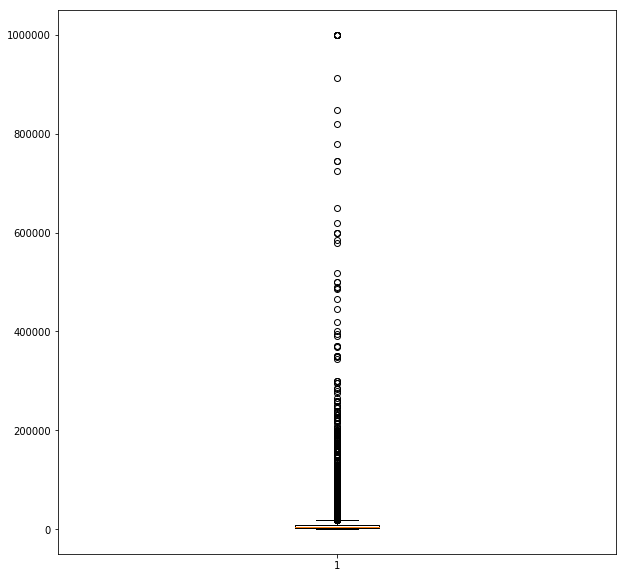

In [45]:
# Plot boxplot of sale prices
plt.figure(figsize=(10,10))
_ = plt.boxplot(df_autos_locs['price'])

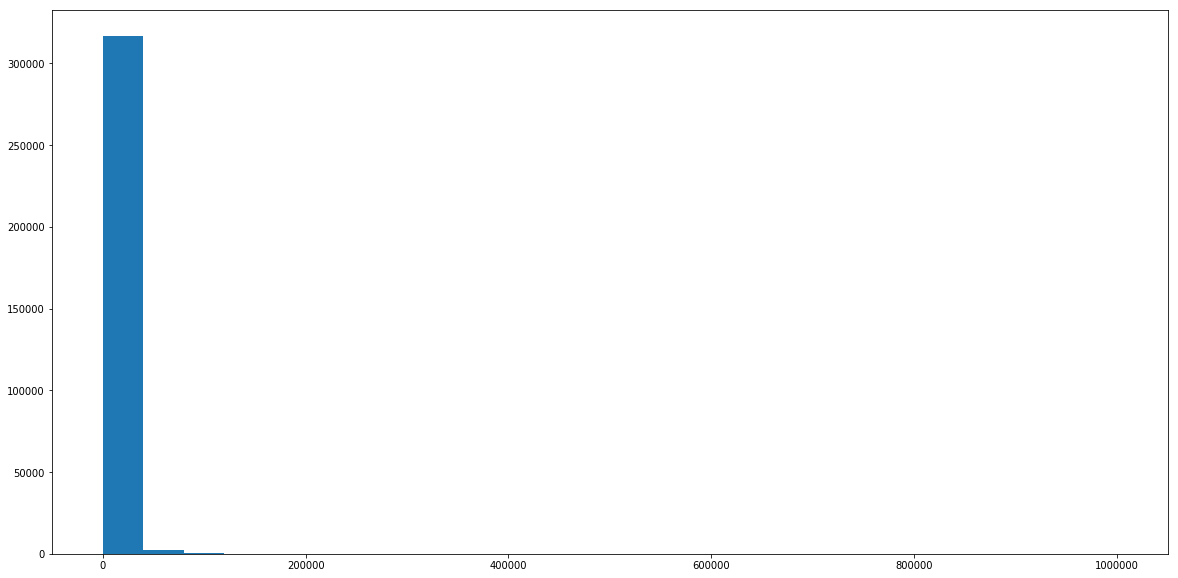

In [46]:
# Plot histogram of sale prices
n_bins = 25
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos_locs.price, bins=n_bins, histtype='bar')

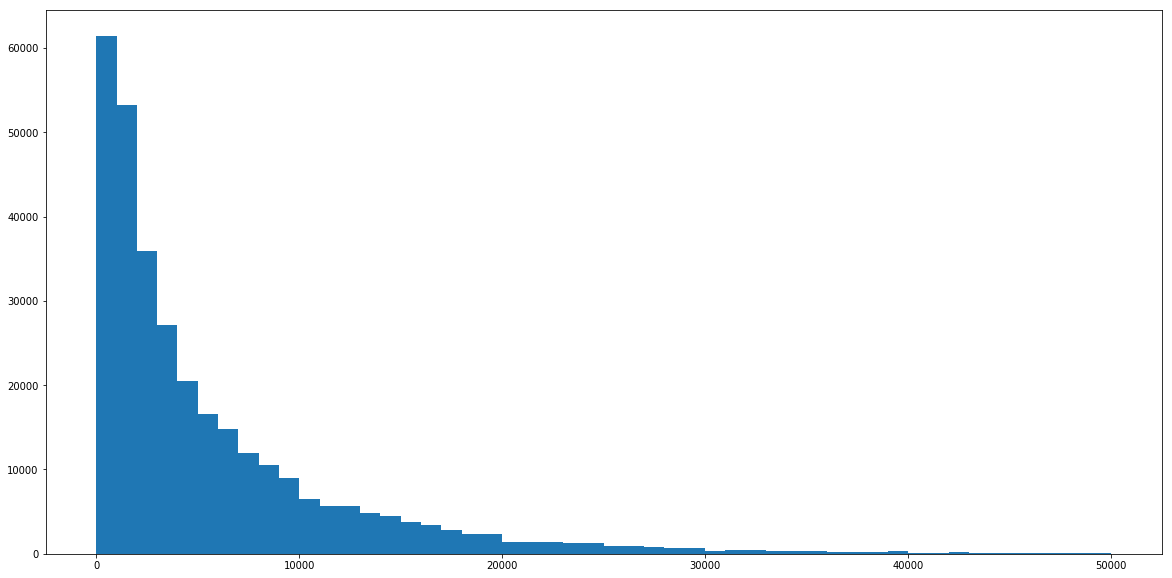

In [47]:
# Plot histogram of sale prices
max_price = 50000
n_bins = 50
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos_locs[df_autos_locs.price <= max_price].price, bins=n_bins, histtype='bar')

### Q7: What is a common mileage for used cars?

In [48]:
# Descriptive Statistics on Kilometers (mileage)
df_autos_locs['kilometer'].describe()

count    319257.000000
mean     125437.280937
std       39434.657862
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

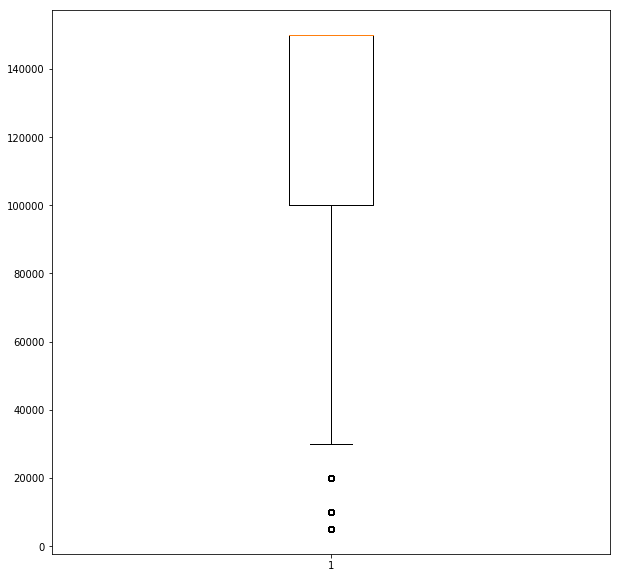

In [49]:
# Plot boxplot of kilometers
plt.figure(figsize=(10,10))
_ = plt.boxplot(df_autos_locs['kilometer'])

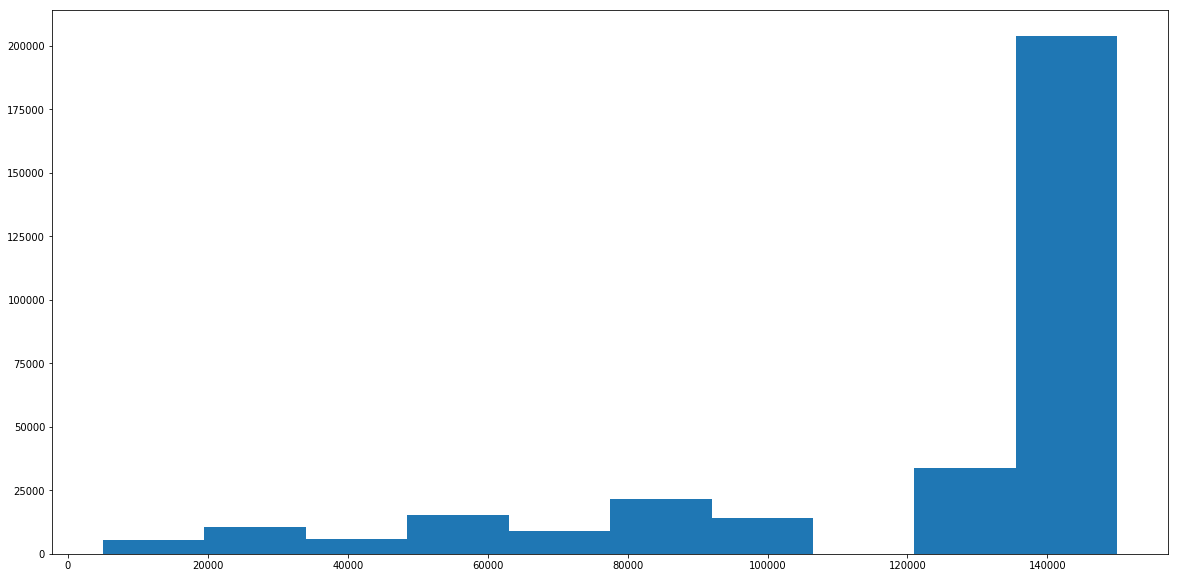

In [50]:
# Plot histogram of kilometers
n_bins = 10
plt.figure(figsize=(20,10))
bins = plt.hist(df_autos_locs.kilometer, bins=n_bins, histtype='bar')

### Q8: Can a car value be predicted by using features from the add?

For this question, first of all, (a) suited algorithm(s) need(s) to be chosen. For this, sklearn's 'Choosing the right estimator'-page is helpful, available via https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html :

As we want to predict prizes, the following algorithms are possible:
Start --> >50 samples - yes --> predicting a category - no --> predicting a quantity - yes --> <100K samples - no --> few features should be important - no --> RidgeRegression / SVR(kernel='linear) --> not working - ? --> SVR(kernel='rbf') / EnsembleRegressors

Alright, that leaves us with a couple of regression-algorithms to select the best-performing one from:
- RidgeRegression
- SVR(kernel='linear)
- SVR(kernel='rbf')
- EnsembleRegressors

Several specific data preparation and further steps are needed. The pipeline for this is as follows:
1. Chose generally relevant columns
- Delete remaining NaN-values
- Transform discrete Values
- ~~Tune prices to a normal distribution, as they are right-skewed~~
- Add dummy columns for the cateogorial features
- Select relevant features
- ~~Normalize/Scale features~~
- Train-Test-Split
- Train regressor
- Evaluate and fine-tune

In [51]:
df_autos_locs.shape

(319257, 15)

In [52]:
df_autos_locs.head(3)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,lon,lat,Ort,age
0,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja,66954,7.564295,49.202121,Pirmasens,5
1,3450,kleinwagen,2007,manuell,88,fiesta,100000,benzin,ford,nein,66954,7.564295,49.202121,Pirmasens,9
2,950,bus,1998,manuell,114,espace,150000,benzin,renault,nein,66954,7.564295,49.202121,Pirmasens,18


In [53]:
# Delete model-column, as it is too specific.
# Also postal-code and Ort (city) are not useful for this task, as there are also too many values.
# 'yearOfRegistration' is redunant with age and is therefore deleted as well.
df_autos_locs_reg = df_autos_locs.drop(columns=['model', 'postalCode', 'Ort', 'yearOfRegistration'])

# Drop Rows, that have NaN-values in relevant columns
df_autos_locs_reg = df_autos_locs_reg.dropna()
df_autos_locs_reg.shape

(257091, 11)

After dropping all rows containing NaN values, the dataset still has 257091 rows, what definitely is sufficient.

In [54]:
# Transform discrete values in dataset
# There are two discrete columns: 'gearbox' and 'notRepairedDamage'.
# 'gearbox' will be transformed to 'automaticGear', with 1 for automatic and 0 for manuell. 'Gearbox' will be deleted.

d = {'automatik': 1,'manuell': 0}
df_autos_locs_reg.gearbox = [d[item] for item in df_autos_locs_reg.gearbox]
df_autos_locs_reg = df_autos_locs_reg.rename(columns={'gearbox': 'automaticGear'})

# Transform values in 'notRepairedDamage'
d = {'ja': 1,'nein': 0}
df_autos_locs_reg.notRepairedDamage = [d[item] for item in df_autos_locs_reg.notRepairedDamage]

df_autos_locs_reg.head(3)

,price,vehicleType,automaticGear,powerPS,kilometer,fuelType,brand,notRepairedDamage,lon,lat,age
0,18300,coupe,0,190,125000,diesel,audi,1,7.564295,49.202121,5
1,3450,kleinwagen,0,88,100000,benzin,ford,0,7.564295,49.202121,9
2,950,bus,0,114,150000,benzin,renault,0,7.564295,49.202121,18


In [55]:
# Display correlation matrix
corr = df_autos_locs_reg.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,automaticGear,powerPS,kilometer,notRepairedDamage,lon,lat,age
price,1,0.23,0.48,-0.36,-0.13,0.014,-0.062,-0.3
automaticGear,0.23,1,0.46,-0.043,-0.039,0.027,0.018,-0.11
powerPS,0.48,0.46,1,-0.027,-0.075,0.021,-0.073,-0.2
kilometer,-0.36,-0.043,-0.027,1,0.11,-0.025,0.043,0.38
notRepairedDamage,-0.13,-0.039,-0.075,0.11,1,-0.011,0.008,0.14
lon,0.014,0.027,0.021,-0.025,-0.011,1,-0.0029,0.0029
lat,-0.062,0.018,-0.073,0.043,0.008,-0.0029,1,0.043
age,-0.3,-0.11,-0.2,0.38,0.14,0.0029,0.043,1


Tuning the dependent variable prices to a normal distribution will be skipped for now, as it did not work properly and might not be neccessary at all for the used algorithms.

In [56]:
# Get dummies for columns 'vehicleType', 'fuelType', and 'brand'.
df_autos_locs_reg_dum = pd.get_dummies(df_autos_locs_reg)
df_autos_locs_reg_dum.head(3)

,price,automaticGear,powerPS,kilometer,notRepairedDamage,lon,lat,age,vehicleType_andere,vehicleType_bus,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,18300,0,190,125000,1,7.564295,49.202121,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3450,0,88,100000,0,7.564295,49.202121,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950,0,114,150000,0,7.564295,49.202121,18,0,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Extract features and perform train test split

#X = normalize(df_autos_locs_reg_dum.drop('price', axis=1)) # No normalization, as it worsened the performance.
#scaler = StandardScaler()
#X = scaler.fit_transform(df_autos_locs_reg_dum.drop('price', axis=1)) # No scaling, performanced stayed the same.

y = df_autos_locs_reg_dum.price
X = df_autos_locs_reg_dum.drop('price', axis=1)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Quick test, which algorithm seems to perform best for this task
#for regressor in [Ridge(), GradientBoostingRegressor(verbose=1), BaggingRegressor(verbose=1, random_state=42), SVR(kernel='linear', verbose=1), SVR(kernel='sbf', verbose=1)]:
for regressor in [Ridge(random_state=42), GradientBoostingRegressor(verbose=1, random_state=42),
                  BaggingRegressor(verbose=1, random_state=42), XGBRegressor(TREE_METHOD = 'gpu_hist')]:
    print(regressor)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)    
    print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
    #print('Explained variance score: {}'.format(r2_score(y_test, y_pred)))
    print('Mean Squared Error score: {}'.format(mean_squared_error(y_test, y_pred)))
    print()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)
R2 score: 0.534182421102116
Mean Squared Error score: 44730016.494145215

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)
      Iter       Train Loss   Remaining Time 
         1   134324884.7986           31.39s
         2   125168273.2704           30.04s
         3   117714782.6458           28.49s
         4   111661650.7561           28.09s
         5   106334640.7923           27.54s
 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


R2 score: 0.6255429528180207
Mean Squared Error score: 35959874.925822616

XGBRegressor(TREE_METHOD='gpu_hist', base_score=0.5, booster='gbtree',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0, importance_type='gain', learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)


C:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:10:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: 0.7035365801155459
Mean Squared Error score: 28467080.863625173



It seems like the **XGBRegressor** is suited best for this task, as it shows - together with GradientBoostingRegressor - the best R2 without tuning, but is faster than GradientBoostingRegressor, as it runs on GPU. SVM couldn't be tested, as its training took too long for the large training data. So I will continue with XGBRegressor and fine-tune its hyperparameters in the following.

In [ ]:
# Use gridsearch to tune parameters for regressor
#parameters = {'alpha':[0.5, 0.9, 1], 'learning_rate':[0.01, 0.1, 1], 'max_depth':[2, 3, 10],
#              'min_samples_leaf':[1, 3, 5], 'n_estimators':[100, 500], 'max_features':['auto', 'sqrt', 0.5]}

#parameters = {'alpha':[0.5, 0.9, 1], 'learning_rate':[0.001, 0.01, 0.1, 1], 'max_depth':[2, 3, 5, 10],
#              'min_samples_leaf':[1, 2, 3, 5], 'n_estimators':[50, 100, 500], 'max_features':['auto', 'sqrt', 0.3, 0.7]}

parameters = {'learning_rate':[0.05, 0.1, 0.5], 'max_depth':[3, 5, 7], 'min_child_weight':[1,3,6],
              'gamma':[0, 0.1, 0.5], 'colsample_bytree':[0.5, 0.8, 0.9], 'scale_pos_weight': [0, 1],
             'n_estimators':[50, 100, 500]}

reg = XGBRegressor(TREE_METHOD = 'gpu_hist', random_state=42)
gscv = GridSearchCV(reg, parameters, cv=2, verbose=5, n_jobs=12, return_train_score=False)
gscv.fit(X_train, y_train)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 2 folds for each of 1458 candidates, totalling 2916 fits


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed: 38.2min
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed: 55.5min
[Parallel(n_jobs=12)]: Done 858 tasks      | elapsed: 77.5min
[Parallel(n_jobs=12)]: Done 1128 tasks      | elapsed: 104.9min


## Step 5: Evaluation

In [105]:
# Evaluate mode
y_pred = regressor.predict(X_test)
print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
print('Mean Squared Error score: {}'.format(mean_squared_error(y_test, y_pred)))

R2 score: 0.7035365801155459
Mean Squared Error score: 28467080.863625173


## Step 6: Deployment

In [103]:
# Save model as .pkl
filename = 'regressor.pkl'
pickle.dump(regressor, open(filename, 'wb'))
# Export zips
pickle.dump(df_zips, open('zips.pkl', 'wb'))
# Export dataframe for command line app
pickle.dump(df_autos_locs_reg_dum.drop('price', axis=1).columns, open('df_cols.pkl', 'wb'))

In [106]:
# Save models from gridsearchCV
pickle.dump(reg, open('gs_reg.pkl', 'wb'))
pickle.dump(gscv, open('gs_gscv.pkl', 'wb'))

NameError: name 'reg' is not defined

In [104]:
# Load regressor from .pkl and test
loaded_regressor = pickle.load(open(filename, 'rb'))
y_pred = loaded_regressor.predict(X_test)
print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
print('Mean Squared Error score: {}'.format(mean_squared_error(y_test, y_pred)))

[20:15:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: 0.7035365801155459
Mean Squared Error score: 28467080.863625173


In [ ]:
# Export this notebook as .html
from subprocess import call
call(['python', '-m', 'nbconvert', 'German_used_Cars.ipynb'])